##### Kristie Kooken 
##### Project 3 - rest API nutrition information 



The API I ended up using is located here: 
https://rapidapi.com/msilverman/api/nutritionix-nutrition-database

In Milestone 1, I had another API as my selection however, my initial site charged for use as well as did not respond to my request to use their API. Then I found another API that seems to have all the necessary food information except it had no restaurant food information (though it advertized restaurant API was included). This is key for my comparisons. So, I spent a lot more time digging around the different avaialable APIs and decided on the one listed above. This API does have limited nutritional information however, it also has restaurant foods. Because of this - it became my choice. 

In [1]:
# loading libraries 

import numpy as np
import pandas as pd

import statistics 

import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

import json
import pprint
from requests.exceptions import HTTPError
import requests

Reading in my first batch of API. This API search is different than others I tried though this API has restaurant information which I want. Also there is no nutrition information except calorie and fat however - I have to make more than one pull of the api to get more items in the search. I ran a quite a few tests to try to get more than one term (e.g. 'cheeseburger') however, the results were not as I expected so I am going to search for different items separately. So many things to learn just in pulling this simple amount of information. I am realizing that these APIs seem to be put together or lists from where? Who puts them together? Are they comprehensive? These are questions that are not answered in documentation that I had access to. 

In [2]:
# making function for the API call 
# I tried to modified the querystring and add serving_weight_grams but no dice. I did not realize my API was truncated in terms 
# of records returned until 
# now but I am going to keep going
def apipull (path):
    for url in [path]:
        try:

            querystring = {"fields":"item_name,item_id,brand_name,nf_calories,nf_total_fat"}

            headers = {"X-RapidAPI-Key": "88a33f1a5bmsh6ce8d62cbdc16dcp178b89jsn20adbe3bbee4",
                       "X-RapidAPI-Host": "nutritionix-api.p.rapidapi.com"
                      }

            response = requests.request("GET", url, headers=headers, params=querystring)

            json_response = response.json()

            # If the response was successful, no Exception will be raised
            response.raise_for_status()
        except HTTPError as http_err:
            print(f'HTTP error occurred: {http_err}')  
        except Exception as err:
            print(f'Other error occurred: {err}')  
        else:
            print('Success!')
    return json_response

In [3]:
cb = apipull("https://nutritionix-api.p.rapidapi.com/v1_1/search/hamburger")

Success!


In [4]:
# creating function to print
def lookpp (indata):
    
    outdata = None
    
    print(type(indata))
    
    # construct PrettyPrinter first
    pp = pprint.PrettyPrinter(indent=2, width=30, compact=True)
 
    print("Pretty Printing using pprint module")
    pp.pprint(indata)

    
  

In [5]:
# looking at data
lookpp(cb)

<class 'dict'>
Pretty Printing using pprint module
{ 'hits': [ { '_id': '513fc999927da70408005c86',
              '_index': 'f762ef22-e660-434f-9071-a10ea6691c27',
              '_score': 3.8925614,
              '_type': 'item',
              'fields': { 'brand_name': 'A&W '
                                        'Restaurants',
                          'item_id': '513fc999927da70408005c86',
                          'item_name': 'Hamburger',
                          'nf_calories': 350,
                          'nf_serving_size_qty': 1,
                          'nf_serving_size_unit': 'serving',
                          'nf_total_fat': 11}},
            { '_id': '513fc9cb673c4fbc260053cf',
              '_index': 'f762ef22-e660-434f-9071-a10ea6691c27',
              '_score': 3.8925614,
              '_type': 'item',
              'fields': { 'brand_name': 'The '
                                        'Varsity',
                          'item_id': '513fc9cb673c4fbc260053cf',
  

In [6]:
# flattening my json data 

burger = pd.json_normalize(cb['hits'])
burger

_index _type                       _id  \
0  f762ef22-e660-434f-9071-a10ea6691c27  item  513fc999927da70408005c86   
1  f762ef22-e660-434f-9071-a10ea6691c27  item  513fc9cb673c4fbc260053cf   
2  f762ef22-e660-434f-9071-a10ea6691c27  item  5e561a389b8dbfdb7e6c3a71   
3  f762ef22-e660-434f-9071-a10ea6691c27  item  513fc992927da704080005da   
4  f762ef22-e660-434f-9071-a10ea6691c27  item  54eb7eec9c0b588854154330   
5  f762ef22-e660-434f-9071-a10ea6691c27  item  513fc9e73fe3ffd4030010e5   
6  f762ef22-e660-434f-9071-a10ea6691c27  item  513fc9ca673c4fbc260046ee   
7  f762ef22-e660-434f-9071-a10ea6691c27  item  c6405291f1393db78caf5a7e   
8  f762ef22-e660-434f-9071-a10ea6691c27  item  5d9c367ec010b67b0ba74cdb   
9  f762ef22-e660-434f-9071-a10ea6691c27  item  630756fbaac4c9000818938b   

     _score            fields.item_id fields.item_name  \
0  3.892561  513fc999927da70408005c86        Hamburger   
1  3.892561  513fc9cb673c4fbc260053cf        Hamburger   
2  3.892561  5e561a389b8dbfdb7e6c3a71        Hamburger   
3  3.827558  513fc992927da704080005da        Hamburger   
4  3.566040  54eb7eec9c0b588854154330        Hamburger   
5  3.566040  513fc9e73fe3ffd4030010e5        Hamburger   
6  3.562704  513fc9ca673c4fbc260046ee        Hamburger   
7  3.562704  c6405291f1393db78caf5a7e        Hamburger   
8  3.488318  5d9c367ec010b67b0ba74cdb        Hamburger   
9  3.488318  630756fbaac4c9000818938b        Hamburger   

             fields.brand_name  fields.nf_calories  fields.nf_total_fat  \
0              A&W Restaurants              350.00                 11.0   
1                  The Varsity              200.00                  9.0   
2                  Black Angus              255.57                 20.0   
3              Jack in the Box              340.00                 18.0   
4                  Nutrisystem              240.00                  8.0   
5                   McDonald's              250.00                  9.0   
6  Original Tommy's Hamburgers              460.00                 22.0   
7            Milo's Hamburgers              340.00                 12.0   
8                        Franz              180.00                  3.0   
9                          POM              160.00                  2.5   

   fields.nf_serving_size_qty fields.nf_serving_size_unit  
0                           1                     serving  
1                           1                     serving  
2                           1                     serving  
3                           1                     serving  
4                           1                     serving  
5                           1                     serving  
6                           1                     serving  
7                           1                     serving  
8                           1                     serving  
9                           1                     serving

In [7]:
# more API calls are listed below 
rb = apipull("https://nutritionix-api.p.rapidapi.com/v1_1/search/pork%20ribs")

Success!


In [8]:
# print it 
lookpp(rb)

<class 'dict'>
Pretty Printing using pprint module
{ 'hits': [ { '_id': '5602bce6b49dcc066e582593',
              '_index': 'f762ef22-e660-434f-9071-a10ea6691c27',
              '_score': 12.04828,
              '_type': 'item',
              'fields': { 'brand_name': 'Nutritionix',
                          'item_id': '5602bce6b49dcc066e582593',
                          'item_name': 'BBQ '
                                       'Ribs '
                                       '- '
                                       '1 '
                                       'rack '
                                       '(12 '
                                       'ribs)',
                          'nf_calories': 1523.45,
                          'nf_serving_size_qty': 1,
                          'nf_serving_size_unit': 'serving',
                          'nf_total_fat': 114.64}},
            { '_id': '5602bb4371c09ba157d0ec8c',
              '_index': 'f762ef22-e660-434f-9071-a10ea6691c27',
 

In [9]:
# flattening my json data 

ribs = pd.json_normalize(rb['hits'])
ribs

_index _type                       _id  \
0  f762ef22-e660-434f-9071-a10ea6691c27  item  5602bce6b49dcc066e582593   
1  f762ef22-e660-434f-9071-a10ea6691c27  item  5602bb4371c09ba157d0ec8c   
2  f762ef22-e660-434f-9071-a10ea6691c27  item  5602baa362672bfa1a0efa24   
3  f762ef22-e660-434f-9071-a10ea6691c27  item  5602baa3e3294e2f18fa57b7   
4  f762ef22-e660-434f-9071-a10ea6691c27  item  5602bce6c9feaf7364afc36b   
5  f762ef22-e660-434f-9071-a10ea6691c27  item  57cd18543f8b952b70e36da6   
6  f762ef22-e660-434f-9071-a10ea6691c27  item  5266a25f9f05a39eb3010cf2   
7  f762ef22-e660-434f-9071-a10ea6691c27  item  555204838e56e17c05e307e8   
8  f762ef22-e660-434f-9071-a10ea6691c27  item  5a9e3d86852841ba1c40ab03   
9  f762ef22-e660-434f-9071-a10ea6691c27  item  5bcad4e8718a9d930f81206b   

      _score            fields.item_id                 fields.item_name  \
0  12.048280  5602bce6b49dcc066e582593      BBQ Ribs - 1 rack (12 ribs)   
1  11.989376  5602bb4371c09ba157d0ec8c  BBQ Ribs - 1 half rack (6 ribs)   
2  11.895040  5602baa362672bfa1a0efa24           BBQ Ribs - 1 large rib   
3  11.786969  5602baa3e3294e2f18fa57b7           BBQ Ribs - 1 small rib   
4  11.559363  5602bce6c9feaf7364afc36b                 BBQ Ribs - 1 rib   
5   2.419925  57cd18543f8b952b70e36da6                         Pork Pie   
6   2.358666  5266a25f9f05a39eb3010cf2                        Pork Ribs   
7   2.326250  555204838e56e17c05e307e8                        Pork Ribs   
8   2.284639  5a9e3d86852841ba1c40ab03                   Pork Back Ribs   
9   2.254634  5bcad4e8718a9d930f81206b                 Smoked Pork Ribs   

       fields.brand_name  fields.nf_calories  fields.nf_total_fat  \
0            Nutritionix             1523.45               114.64   
1            Nutritionix              761.72                57.32   
2            Nutritionix              165.04                12.42   
3            Nutritionix               92.04                 6.93   
4            Nutritionix              126.95                 9.55   
5                   Pork              373.55                25.50   
6  Dickey's Barbecue Pit             1280.00               107.00   
7    Tony Roma's Grocery              360.00                18.00   
8                Unknown              320.00                16.00   
9                Wegmans              170.00                 8.00   

   fields.nf_serving_size_qty fields.nf_serving_size_unit  
0                           1                     serving  
1                           1                     serving  
2                           1                     serving  
3                           1                     serving  
4                           1                     serving  
5                           1                     serving  
6                           1                     serving  
7                           1                     serving  
8                           1                     serving  
9                           1                     serving

In [10]:
cx = apipull("https://nutritionix-api.p.rapidapi.com/v1_1/search/chicken%20sandwich")

Success!


In [11]:
lookpp(cx)

<class 'dict'>
Pretty Printing using pprint module
{ 'hits': [ { '_id': '63f525d299d0f30008a4a88c',
              '_index': 'f762ef22-e660-434f-9071-a10ea6691c27',
              '_score': 2.8860698,
              '_type': 'item',
              'fields': { 'brand_name': 'Sandwich',
                          'item_id': '63f525d299d0f30008a4a88c',
                          'item_name': 'Chicken '
                                       'Salad',
                          'nf_calories': 482.47,
                          'nf_serving_size_qty': 1,
                          'nf_serving_size_unit': 'serving',
                          'nf_total_fat': 25.2}},
            { '_id': '513fc9cd673c4fbc26006e55',
              '_index': 'f762ef22-e660-434f-9071-a10ea6691c27',
              '_score': 1.4053321,
              '_type': 'item',
              'fields': { 'brand_name': 'Chicken '
                                        'Shack',
                          'item_id': '513fc9cd673c4fbc26006e55',

In [12]:
# flattening my json data 

chix = pd.json_normalize(cx['hits'])
chix

_index _type                       _id  \
0  f762ef22-e660-434f-9071-a10ea6691c27  item  63f525d299d0f30008a4a88c   
1  f762ef22-e660-434f-9071-a10ea6691c27  item  513fc9cd673c4fbc26006e55   
2  f762ef22-e660-434f-9071-a10ea6691c27  item  5b9cb1a29cd9cb70160fb708   
3  f762ef22-e660-434f-9071-a10ea6691c27  item  5ccfdde629b2d99505326045   
4  f762ef22-e660-434f-9071-a10ea6691c27  item  53444d8f7ba4ca15456f56f5   
5  f762ef22-e660-434f-9071-a10ea6691c27  item  521b95cc4a56d006d578bb4c   
6  f762ef22-e660-434f-9071-a10ea6691c27  item  53444d8f7395ed134519ebb3   
7  f762ef22-e660-434f-9071-a10ea6691c27  item  152195055a1b342523229548   
8  f762ef22-e660-434f-9071-a10ea6691c27  item  553db158a566fc721a48c7e9   
9  f762ef22-e660-434f-9071-a10ea6691c27  item  d3ea28392e9f91a49d8bffc2   

     _score            fields.item_id  \
0  2.886070  63f525d299d0f30008a4a88c   
1  1.405332  513fc9cd673c4fbc26006e55   
2  1.339848  5b9cb1a29cd9cb70160fb708   
3  1.326795  5ccfdde629b2d99505326045   
4  1.299275  53444d8f7ba4ca15456f56f5   
5  1.286617  521b95cc4a56d006d578bb4c   
6  1.286617  53444d8f7395ed134519ebb3   
7  1.281179  152195055a1b342523229548   
8  1.275703  553db158a566fc721a48c7e9   
9  1.265022  d3ea28392e9f91a49d8bffc2   

                          fields.item_name  fields.brand_name  \
0                            Chicken Salad           Sandwich   
1                         Chicken Sandwich      Chicken Shack   
2                   Spicy Chicken Sandwich    Market Sandwich   
3            Sandwich, Chicken & Provolone  Portland Sandwich   
4                     BBQ Chicken Sandwich     Cowboy Chicken   
5                   Spicy Chicken Sandwich   Church's Chicken   
6                   Chicken Salad Sandwich     Cowboy Chicken   
7                  Crispy Chicken Sandwich     Cowboy Chicken   
8  Flatbread Pocket Sandwich, Chicken Melt     Sandwich Bros.   
9                 Buffalo Chicken Sandwich  Chester's Chicken   

   fields.nf_calories  fields.nf_total_fat  fields.nf_serving_size_qty  \
0              482.47                 25.2                           1   
1              630.00                 34.0                           1   
2              520.00                 16.0                           1   
3              470.00                 21.0                           1   
4              640.00                 23.0                           1   
5              360.00                 19.0                           1   
6              460.00                 15.0                           1   
7              760.00                 37.0                           1   
8              160.00                  8.0                           1   
9              700.00                 35.0                           1   

  fields.nf_serving_size_unit  
0                     serving  
1                     serving  
2                     serving  
3                     serving  
4                     serving  
5                     serving  
6                     serving  
7                     serving  
8                     serving  
9                     serving

In [13]:
sal = apipull("https://nutritionix-api.p.rapidapi.com/v1_1/search/Steak")

Success!


In [14]:
lookpp(sal)

<class 'dict'>
Pretty Printing using pprint module
{ 'hits': [ { '_id': '513fceb575b8dbbc21001bd2',
              '_index': 'f762ef22-e660-434f-9071-a10ea6691c27',
              '_score': 13.000044,
              '_type': 'item',
              'fields': { 'brand_name': 'USDA',
                          'item_id': '513fceb575b8dbbc21001bd2',
                          'item_name': 'Steak '
                                       '- '
                                       '1 '
                                       'steak '
                                       '(yield '
                                       'from '
                                       '518 '
                                       'g '
                                       'raw '
                                       'meat)',
                          'nf_calories': 814.08,
                          'nf_serving_size_qty': 1,
                          'nf_serving_size_unit': 'serving',
                          'nf_t

In [15]:
# flattening my json data 

sals = pd.json_normalize(sal['hits'])
sals

_index _type                       _id  \
0  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc21001bd2   
1  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc21001bd1   
2  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc21001be1   
3  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc21001be2   
4  f762ef22-e660-434f-9071-a10ea6691c27  item  529e7de1ea63d4933500255a   
5  f762ef22-e660-434f-9071-a10ea6691c27  item  c6406254500c394dda26d4f3   
6  f762ef22-e660-434f-9071-a10ea6691c27  item  1521995015d24c844b0abae9   
7  f762ef22-e660-434f-9071-a10ea6691c27  item  513fc9c4673c4fbc2600062f   
8  f762ef22-e660-434f-9071-a10ea6691c27  item  5bd956c3ceefab3f628e36a2   
9  f762ef22-e660-434f-9071-a10ea6691c27  item  152127169783ecf2dd8ef4db   

      _score            fields.item_id  \
0  13.000044  513fceb575b8dbbc21001bd2   
1  12.899071  513fceb575b8dbbc21001bd1   
2  12.791737  513fceb575b8dbbc21001be1   
3  12.791252  513fceb575b8dbbc21001be2   
4   3.856172  529e7de1ea63d4933500255a   
5   3.856172  c6406254500c394dda26d4f3   
6   3.819628  1521995015d24c844b0abae9   
7   3.795704  513fc9c4673c4fbc2600062f   
8   3.795704  5bd956c3ceefab3f628e36a2   
9   3.746088  152127169783ecf2dd8ef4db   

                              fields.item_name          fields.brand_name  \
0  Steak - 1 steak (yield from 518 g raw meat)                       USDA   
1                                 Steak - 3 oz                       USDA   
2                     Porterhouse Steak - 1 lb                       USDA   
3                     Porterhouse Steak - 3 oz                       USDA   
4                                        Steak            Mellow Mushroom   
5                                        Steak  Salsarita's Fresh Cantina   
6                                        Steak        Hummus And Pita Co.   
7                                        Steak                Great Steak   
8                                        Steak               Omaha Steaks   
9                                        Steak                 Barberitos   

   fields.nf_calories  fields.nf_total_fat  fields.nf_serving_size_qty  \
0              814.08                37.13                           1   
1              180.20                 8.22                           1   
2              961.63                50.71                           1   
3              180.20                 9.50                           1   
4              140.00                 8.00                           1   
5               30.00                 1.50                           1   
6              200.00                10.00                           1   
7              140.00                 5.00                           1   
8              380.00                30.00                           1   
9              180.00                10.00                           1   

  fields.nf_serving_size_unit  
0                     serving  
1                     serving  
2                     serving  
3                     serving  
4                     serving  
5                     serving  
6                     serving  
7                     serving  
8                     serving  
9                     serving

In [16]:
# I spent a long time trying to loop this and I am not getting expect results so I am reverting to the long way of coding
#lists = (Eggplant', 'Califlower', 'Brocoli', 'Artichokes', "Arugula", "Aspargus","Carrots", "Corn")
#for i in range(len(lists)):
 #   key_i = 'key_{}'.format(i)  # a string depending on i
 #   frt[key_i] = apipull("https://nutritionix-api.p.rapidapi.com/v1_1/search/list")


# doing API pulls for the same vegetables as on Milestone 2 
frt1 = apipull("https://nutritionix-api.p.rapidapi.com/v1_1/search/Eggplant")
frt2 = apipull("https://nutritionix-api.p.rapidapi.com/v1_1/search/Califlower")
frt3 = apipull("https://nutritionix-api.p.rapidapi.com/v1_1/search/Brocoli")
frt4 = apipull("https://nutritionix-api.p.rapidapi.com/v1_1/search/Artichokes")
frt5 = apipull("https://nutritionix-api.p.rapidapi.com/v1_1/search/Salad")
frt6 = apipull("https://nutritionix-api.p.rapidapi.com/v1_1/search/Asparagus")
frt7 = apipull("https://nutritionix-api.p.rapidapi.com/v1_1/search/Carrots")
frt8 = apipull("https://nutritionix-api.p.rapidapi.com/v1_1/search/Corn")

Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


In [17]:
# flattening my json data 
frts1 = pd.json_normalize(frt1['hits'])
frts1

_index _type                       _id  \
0  f762ef22-e660-434f-9071-a10ea6691c27  item  5750701dec751eef30458d6c   
1  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc21001561   
2  f762ef22-e660-434f-9071-a10ea6691c27  item  575070290e8a3ceb34f9d6bc   
3  f762ef22-e660-434f-9071-a10ea6691c27  item  57507033e48040fe1d34257c   
4  f762ef22-e660-434f-9071-a10ea6691c27  item  57507037cd0344dd30055130   
5  f762ef22-e660-434f-9071-a10ea6691c27  item  5bb531f2d9f36c8101710c52   
6  f762ef22-e660-434f-9071-a10ea6691c27  item  529e7dd8f9655f6d350020d5   
7  f762ef22-e660-434f-9071-a10ea6691c27  item  59b393a2344bf0191eea7013   
8  f762ef22-e660-434f-9071-a10ea6691c27  item  5bc60a40dd79522c6e869158   
9  f762ef22-e660-434f-9071-a10ea6691c27  item  59e5ae311cdbdc89568d9106   

      _score            fields.item_id  \
0  14.007084  5750701dec751eef30458d6c   
1  13.277482  513fceb575b8dbbc21001561   
2  12.962016  575070290e8a3ceb34f9d6bc   
3  12.962016  57507033e48040fe1d34257c   
4  12.599193  57507037cd0344dd30055130   
5  12.170721  5bb531f2d9f36c8101710c52   
6   5.406052  529e7dd8f9655f6d350020d5   
7   4.594727  59b393a2344bf0191eea7013   
8   2.548526  5bc60a40dd79522c6e869158   
9   2.294509  59e5ae311cdbdc89568d9106   

                                    fields.item_name fields.brand_name  \
0                Cooked Eggplant - 1 medium eggplant              USDA   
1                 Cooked Eggplant - 1 cup (1" cubes)              USDA   
2                 Cooked Eggplant - 1 large eggplant              USDA   
3                 Cooked Eggplant - 1 small eggplant              USDA   
4                          Cooked Eggplant - 1 slice              USDA   
5  Eggplant, lentil and quinoa casserole - 1 serving       Nutritionix   
6                                           Eggplant          Chickpea   
7                                           Eggplant          Severino   
8                        Asian Eggplant - 1 eggplant       Nutritionix   
9                                 Marinated Eggplant           Cosmo's   

   fields.nf_calories  fields.nf_total_fat  fields.nf_serving_size_qty  \
0              198.10                 1.31                           1   
1               34.65                 0.23                           1   
2              238.70                 1.58                           1   
3              151.20                 1.00                           1   
4               19.25                 0.13                           1   
5              140.32                 1.46                           1   
6               10.00                 0.00                           1   
7              170.00                 7.00                           1   
8               80.50                 0.53                           1   
9               15.00                 1.00                           1   

  fields.nf_serving_size_unit  
0                     serving  
1                     serving  
2                     serving  
3                     serving  
4                     serving  
5                     serving  
6                     serving  
7                     serving  
8                     serving  
9                     serving

In [18]:
# flattening my json data 
frts2 = pd.json_normalize(frt2['hits'])
frts2

_index _type                       _id  \
0  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc210014f6   
1  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc210014f5   
2  f762ef22-e660-434f-9071-a10ea6691c27  item  578907b0401e7a767d62b22d   
3  f762ef22-e660-434f-9071-a10ea6691c27  item  578907a05f5fcdaf0b6fe9dd   
4  f762ef22-e660-434f-9071-a10ea6691c27  item  578907fbcfcf880c2c53bef9   
5  f762ef22-e660-434f-9071-a10ea6691c27  item  552e1249ff2b54d93312f23c   
6  f762ef22-e660-434f-9071-a10ea6691c27  item  556498faa08827756ddff095   
7  f762ef22-e660-434f-9071-a10ea6691c27  item  59b8d8c5096664b6469eba1d   
8  f762ef22-e660-434f-9071-a10ea6691c27  item  5a38ba19108081870b7bf748   
9  f762ef22-e660-434f-9071-a10ea6691c27  item  51c35b4697c3e69de4b00265   

      _score            fields.item_id  \
0  12.244400  513fceb575b8dbbc210014f6   
1  11.943603  513fceb575b8dbbc210014f5   
2  11.943603  578907b0401e7a767d62b22d   
3  11.930375  578907a05f5fcdaf0b6fe9dd   
4  11.930375  578907fbcfcf880c2c53bef9   
5   1.587730  552e1249ff2b54d93312f23c   
6   1.587730  556498faa08827756ddff095   
7   1.587730  59b8d8c5096664b6469eba1d   
8   1.587730  5a38ba19108081870b7bf748   
9   1.587730  51c35b4697c3e69de4b00265   

                           fields.item_name fields.brand_name  \
0  Cooked Cauliflower - 0.5 cup (1" pieces)              USDA   
1          Cooked Cauliflower - 3 flowerets              USDA   
2         Cooked Cauliflower - 1 large head              USDA   
3        Cooked Cauliflower - 1 medium head              USDA   
4         Cooked Cauliflower - 1 small head              USDA   
5                               Cauliflower             Giant   
6                               Cauliflower  America's Choice   
7                               Cauliflower       Green Giant   
8                               Cauliflower       Fresh Thyme   
9                               Cauliflower            Kroger   

   fields.nf_calories  fields.nf_total_fat  fields.nf_serving_size_qty  \
0               14.26                 0.28                           1   
1               12.42                 0.24                           1   
2              193.20                 3.79                           1   
3              132.25                 2.60                           1   
4               60.95                 1.20                           1   
5               25.00                 0.00                           1   
6               20.00                 0.00                           1   
7              130.00                 7.00                           1   
8               17.00                 0.00                           1   
9               20.00                 0.00                           1   

  fields.nf_serving_size_unit  
0                     serving  
1                     serving  
2                     serving  
3                     serving  
4                     serving  
5                     serving  
6                     serving  
7                     serving  
8                     serving  
9                     serving

In [19]:
# flattening my json data 
frts3 = pd.json_normalize(frt3['hits'])
frts3

_index _type                       _id  \
0  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc210014a0   
1  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc210014a2   
2  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc2100149e   
3  f762ef22-e660-434f-9071-a10ea6691c27  item  5e4db5f9643b5a023cfd80a0   
4  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc210014a1   
5  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc2100149f   
6  f762ef22-e660-434f-9071-a10ea6691c27  item  6102ff921e60aba319baec85   
7  f762ef22-e660-434f-9071-a10ea6691c27  item  609d2fca6af0cec91c6b8d52   
8  f762ef22-e660-434f-9071-a10ea6691c27  item  604f67a6fb9eee1a15b74d4e   
9  f762ef22-e660-434f-9071-a10ea6691c27  item  6101c596aeed914ec8ed59bb   

      _score            fields.item_id  \
0  12.347349  513fceb575b8dbbc210014a0   
1  12.246901  513fceb575b8dbbc210014a2   
2  12.197420  513fceb575b8dbbc2100149e   
3  11.617879  5e4db5f9643b5a023cfd80a0   
4  11.617879  513fceb575b8dbbc210014a1   
5  11.115154  513fceb575b8dbbc2100149f   
6  11.115154  6102ff921e60aba319baec85   
7   5.493869  609d2fca6af0cec91c6b8d52   
8   3.808129  604f67a6fb9eee1a15b74d4e   
9   3.488813  6101c596aeed914ec8ed59bb   

                                    fields.item_name fields.brand_name  \
0        Steamed Broccoli - 1 stalk, small (5" long)              USDA   
1   Steamed Broccoli - 1 stalk, large (11"-12" long)              USDA   
2                Steamed Broccoli - 0.5 cup, chopped              USDA   
3                          Steamed Broccoli - 1 head              USDA   
4  Steamed Broccoli - 1 stalk, medium (7-1/2" - 8...              USDA   
5         Steamed Broccoli - 1 spear (about 5" long)              USDA   
6                        Steamed Broccoli - 1 floret              USDA   
7                                            Brocoli       Great Value   
8                                Fresh Riced Brocoli  Wholesome Pantry   
9                                Brocoli Rabe-Rapini          Andy Boy   

   fields.nf_calories  fields.nf_total_fat  fields.nf_serving_size_qty  \
0               49.00                 0.57                           1   
1               98.00                 1.15                           1   
2               27.30                 0.32                           1   
3              129.85                 1.52                           1   
4               63.00                 0.74                           1   
5               12.95                 0.15                           1   
6                3.50                 0.04                           1   
7               25.00                 0.00                           1   
8              100.00                 1.00                           1   
9               10.00                 0.00                           1   

  fields.nf_serving_size_unit  
0                     serving  
1                     serving  
2                     serving  
3                     serving  
4                     serving  
5                     serving  
6                     serving  
7                     serving  
8                     serving  
9                     serving

In [20]:
# flattening my json data 
frts4 = pd.json_normalize(frt4['hits'])
frts4

_index _type                       _id  \
0  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc2100143a   
1  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc2100143b   
2  f762ef22-e660-434f-9071-a10ea6691c27  item  d3ea72745f786d3139c9cb40   
3  f762ef22-e660-434f-9071-a10ea6691c27  item  5fd0d985a3af41f1580689b2   
4  f762ef22-e660-434f-9071-a10ea6691c27  item  53444db59a631f1645ecfc26   
5  f762ef22-e660-434f-9071-a10ea6691c27  item  6048d0b06860bb7b7aca4408   
6  f762ef22-e660-434f-9071-a10ea6691c27  item  5796f451fc3381e17a694e32   
7  f762ef22-e660-434f-9071-a10ea6691c27  item  5e6de124f7fad6443f6ce69b   
8  f762ef22-e660-434f-9071-a10ea6691c27  item  51cb356597c3e632bfc4601f   
9  f762ef22-e660-434f-9071-a10ea6691c27  item  5266a2be9f05a39eb3013610   

      _score            fields.item_id                  fields.item_name  \
0  14.013978  513fceb575b8dbbc2100143a       Artichokes - 0.5 cup hearts   
1  13.832403  513fceb575b8dbbc2100143b  Artichokes - 1 artichoke, medium   
2   5.417713  d3ea72745f786d3139c9cb40                        Artichokes   
3   5.021239  5fd0d985a3af41f1580689b2                        Artichokes   
4   4.787034  53444db59a631f1645ecfc26                        Artichokes   
5   4.470128  6048d0b06860bb7b7aca4408                        Artichokes   
6   4.470128  5796f451fc3381e17a694e32                        Artichokes   
7   4.338282  5e6de124f7fad6443f6ce69b                        Artichokes   
8   4.338282  51cb356597c3e632bfc4601f                        Artichokes   
9   4.302935  5266a2be9f05a39eb3013610                        Artichokes   

        fields.brand_name  fields.nf_calories  fields.nf_total_fat  \
0                    USDA               44.52                 0.29   
1                    USDA               63.60                 0.41   
2              Coolgreens               10.00                 0.00   
3                Forrelli               25.00                 2.00   
4  Figaro's Italian Pizza               10.00                 0.00   
5                   Diana               90.00                 6.00   
6                   Flora              130.00                13.00   
7           Harris Teeter               70.00                 5.00   
8             Village Inn                5.00                 0.00   
9                 Buffets                5.00                 0.00   

   fields.nf_serving_size_qty fields.nf_serving_size_unit  
0                           1                     serving  
1                           1                     serving  
2                           1                     serving  
3                           1                     serving  
4                           1                     serving  
5                           1                     serving  
6                           1                     serving  
7                           1                     serving  
8                           1                     serving  
9                           1                     serving

In [21]:
# flattening my json data 
frts5 = pd.json_normalize(frt5['hits'])
frts5

_index _type                       _id  \
0  f762ef22-e660-434f-9071-a10ea6691c27  item  5644f24f0cb33d6e42899b4e   
1  f762ef22-e660-434f-9071-a10ea6691c27  item  5644f21cb1cf74f205da9920   
2  f762ef22-e660-434f-9071-a10ea6691c27  item  5644f24f0cb33d6e42899b4f   
3  f762ef22-e660-434f-9071-a10ea6691c27  item  557e18a8ed6876f91bfcd545   
4  f762ef22-e660-434f-9071-a10ea6691c27  item  554e8183bd70cb181f338bdd   
5  f762ef22-e660-434f-9071-a10ea6691c27  item  55fa6461afb96a6c62028216   
6  f762ef22-e660-434f-9071-a10ea6691c27  item  5fc64b4e43fb57b01c2504d2   
7  f762ef22-e660-434f-9071-a10ea6691c27  item  58426e764a87d0c773929165   
8  f762ef22-e660-434f-9071-a10ea6691c27  item  63c68186ab914a00068f6627   
9  f762ef22-e660-434f-9071-a10ea6691c27  item  d3ea5613f5f1565bf0ddd267   

      _score            fields.item_id           fields.item_name  \
0  12.204931  5644f24f0cb33d6e42899b4e     Mixed Lettuce - 3 cups   
1  11.686585  5644f21cb1cf74f205da9920  Mixed Lettuce - 1 serving   
2  11.686585  5644f24f0cb33d6e42899b4f       Mixed Lettuce - 3 oz   
3   4.484413  557e18a8ed6876f91bfcd545                      Salad   
4   3.871225  554e8183bd70cb181f338bdd                      Salad   
5   3.871225  55fa6461afb96a6c62028216                      Salad   
6   3.783330  5fc64b4e43fb57b01c2504d2                      Salad   
7   3.721415  58426e764a87d0c773929165                      Salad   
8   3.721415  63c68186ab914a00068f6627                      Salad   
9   3.656630  d3ea5613f5f1565bf0ddd267                      Salad   

   fields.brand_name  fields.nf_calories  fields.nf_total_fat  \
0        Nutritionix               19.98                  0.2   
1        Nutritionix               19.99                  0.2   
2        Nutritionix               19.98                  0.2   
3          Ready Pac              460.00                 32.0   
4     Fresh Attitude              350.00                 29.0   
5           Pita Pal               70.00                  3.5   
6               Chef              140.00                  9.0   
7           Kum & Go              250.00                  7.0   
8        Boar's Head              520.00                  NaN   
9  Rapid Fired Pizza               35.00                  1.0   

   fields.nf_serving_size_qty fields.nf_serving_size_unit  
0                           1                     serving  
1                           1                     serving  
2                           1                     serving  
3                           1                     serving  
4                           1                     serving  
5                           1                     serving  
6                           1                     serving  
7                           1                     serving  
8                           1                     serving  
9                           1                     serving

In [22]:
# flattening my json data 
frts6 = pd.json_normalize(frt6['hits'])
frts6.shape

(10, 11)

In [23]:
# flattening my json data 
frts7 = pd.json_normalize(frt7['hits'])
frts7.shape

(10, 11)

In [24]:
# flattening my json data 
frts8 = pd.json_normalize(frt8['hits'])
frts8.shape

(10, 11)

This is the API that I am going to bring for Milestone 4. The next steps are to combined the like API and clean it up, and prep for merging. I am noting that I always have 9 lines - I looked through the API documentation and it doesn't indicate any limit however, I can see in my pprints - there is usually a big number returned of which I have nine values. As I look at the site I listed at the top - I also note that the example code (where there is Postman in the interface) also returns nine lines though there is no limited indicated. 

In [25]:
# creating variables that are the same as I did for the nutritional information in milestone 2 
# New variables are essentially the search terms 

# step 1 for meat products 
burger["FOOD_CAT1"] = "Beef"

In [26]:
burger.shape

(10, 12)

In [27]:
ribs["FOOD_CAT1"] = "Pork"

In [28]:
ribs.shape

(10, 12)

In [29]:
chix["FOOD_CAT1"] = "Chicken"

In [30]:
chix.shape

(10, 12)

In [31]:
sals["FOOD_CAT1"] = "Beef"

In [32]:
sals.shape

(10, 12)

In [33]:
# creating a data frame for search items related to meat 

df3 = pd.concat([burger,ribs,chix, sals], ignore_index=True)
df3.shape

(40, 12)

In [34]:
# dropping variables and beginning clean up 

df3.drop(['_index','_id','_score', '_type', 'fields.item_id', "fields.nf_serving_size_qty", 
          "fields.nf_serving_size_unit"], axis=1, inplace=True)
df3

fields.item_name            fields.brand_name  \
0                                     Hamburger              A&W Restaurants   
1                                     Hamburger                  The Varsity   
2                                     Hamburger                  Black Angus   
3                                     Hamburger              Jack in the Box   
4                                     Hamburger                  Nutrisystem   
5                                     Hamburger                   McDonald's   
6                                     Hamburger  Original Tommy's Hamburgers   
7                                     Hamburger            Milo's Hamburgers   
8                                     Hamburger                        Franz   
9                                     Hamburger                          POM   
10                  BBQ Ribs - 1 rack (12 ribs)                  Nutritionix   
11              BBQ Ribs - 1 half rack (6 ribs)                  Nutritionix   
12                       BBQ Ribs - 1 large rib                  Nutritionix   
13                       BBQ Ribs - 1 small rib                  Nutritionix   
14                             BBQ Ribs - 1 rib                  Nutritionix   
15                                     Pork Pie                         Pork   
16                                    Pork Ribs        Dickey's Barbecue Pit   
17                                    Pork Ribs          Tony Roma's Grocery   
18                               Pork Back Ribs                      Unknown   
19                             Smoked Pork Ribs                      Wegmans   
20                                Chicken Salad                     Sandwich   
21                             Chicken Sandwich                Chicken Shack   
22                       Spicy Chicken Sandwich              Market Sandwich   
23                Sandwich, Chicken & Provolone            Portland Sandwich   
24                         BBQ Chicken Sandwich               Cowboy Chicken   
25                       Spicy Chicken Sandwich             Church's Chicken   
26                       Chicken Salad Sandwich               Cowboy Chicken   
27                      Crispy Chicken Sandwich               Cowboy Chicken   
28      Flatbread Pocket Sandwich, Chicken Melt               Sandwich Bros.   
29                     Buffalo Chicken Sandwich            Chester's Chicken   
30  Steak - 1 steak (yield from 518 g raw meat)                         USDA   
31                                 Steak - 3 oz                         USDA   
32                     Porterhouse Steak - 1 lb                         USDA   
33                     Porterhouse Steak - 3 oz                         USDA   
34                                        Steak              Mellow Mushroom   
35                                        Steak    Salsarita's Fresh Cantina   
36                                        Steak          Hummus And Pita Co.   
37                                        Steak                  Great Steak   
38                                        Steak                 Omaha Steaks   
39                                        Steak                   Barberitos   

    fields.nf_calories  fields.nf_total_fat FOOD_CAT1  
0               350.00                11.00      Beef  
1               200.00                 9.00      Beef  
2               255.57                20.00      Beef  
3               340.00                18.00      Beef  
4               240.00                 8.00      Beef  
5               250.00                 9.00      Beef  
6               460.00                22.00      Beef  
7               340.00                12.00      Beef  
8               180.00                 3.00      Beef  
9               160.00                 2.50      Beef  
10             1523.45               114.64      Pork  
11              761.72                57.32      Pork  
12              165.04

In [35]:
### removing USDA from the list for Meats - this should be included in Nutrition df so I am removing here
df4 = df3[(df3['fields.brand_name' ] != "USDA")]
df4


fields.item_name            fields.brand_name  \
0                                 Hamburger              A&W Restaurants   
1                                 Hamburger                  The Varsity   
2                                 Hamburger                  Black Angus   
3                                 Hamburger              Jack in the Box   
4                                 Hamburger                  Nutrisystem   
5                                 Hamburger                   McDonald's   
6                                 Hamburger  Original Tommy's Hamburgers   
7                                 Hamburger            Milo's Hamburgers   
8                                 Hamburger                        Franz   
9                                 Hamburger                          POM   
10              BBQ Ribs - 1 rack (12 ribs)                  Nutritionix   
11          BBQ Ribs - 1 half rack (6 ribs)                  Nutritionix   
12                   BBQ Ribs - 1 large rib                  Nutritionix   
13                   BBQ Ribs - 1 small rib                  Nutritionix   
14                         BBQ Ribs - 1 rib                  Nutritionix   
15                                 Pork Pie                         Pork   
16                                Pork Ribs        Dickey's Barbecue Pit   
17                                Pork Ribs          Tony Roma's Grocery   
18                           Pork Back Ribs                      Unknown   
19                         Smoked Pork Ribs                      Wegmans   
20                            Chicken Salad                     Sandwich   
21                         Chicken Sandwich                Chicken Shack   
22                   Spicy Chicken Sandwich              Market Sandwich   
23            Sandwich, Chicken & Provolone            Portland Sandwich   
24                     BBQ Chicken Sandwich               Cowboy Chicken   
25                   Spicy Chicken Sandwich             Church's Chicken   
26                   Chicken Salad Sandwich               Cowboy Chicken   
27                  Crispy Chicken Sandwich               Cowboy Chicken   
28  Flatbread Pocket Sandwich, Chicken Melt               Sandwich Bros.   
29                 Buffalo Chicken Sandwich            Chester's Chicken   
34                                    Steak              Mellow Mushroom   
35                                    Steak    Salsarita's Fresh Cantina   
36                                    Steak          Hummus And Pita Co.   
37                                    Steak                  Great Steak   
38                                    Steak                 Omaha Steaks   
39                                    Steak                   Barberitos   

    fields.nf_calories  fields.nf_total_fat FOOD_CAT1  
0               350.00                11.00      Beef  
1               200.00                 9.00      Beef  
2               255.57                20.00      Beef  
3               340.00                18.00      Beef  
4               240.00                 8.00      Beef  
5               250.00                 9.00      Beef  
6               460.00                22.00      Beef  
7               340.00                12.00      Beef  
8               180.00                 3.00      Beef  
9               160.00                 2.50      Beef  
10             1523.45               114.64      Pork  
11              761.72                57.32      Pork  
12              165.04                12.42      Pork  
13               92.04                 6.93      Pork  
14              126.95                 9.55      Pork  
15              373.55                25.50      Pork  
16             1280.00               107.00      Pork  
17              360.00                18.00      Pork  
18              320.00                16.00      Pork  
19              170.00                 8.00      Pork  
20              482.47                

In [36]:
# step 1 for vegetable products
# the triumph of doing something not the long way and I nearly remembered the syntax

lists = ('Eggplant', 'Califlower', 'Brocoli', 'Artichokes', "Salad", "Aspargus","Carrots", "Corn")
dsname = (frts1, frts2, frts3, frts4, frts5, frts6, frts7, frts8)

for i,j in zip(lists,dsname):
          j["FOOD_CAT1"] = i
        


In [37]:
frts3

_index _type                       _id  \
0  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc210014a0   
1  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc210014a2   
2  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc2100149e   
3  f762ef22-e660-434f-9071-a10ea6691c27  item  5e4db5f9643b5a023cfd80a0   
4  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc210014a1   
5  f762ef22-e660-434f-9071-a10ea6691c27  item  513fceb575b8dbbc2100149f   
6  f762ef22-e660-434f-9071-a10ea6691c27  item  6102ff921e60aba319baec85   
7  f762ef22-e660-434f-9071-a10ea6691c27  item  609d2fca6af0cec91c6b8d52   
8  f762ef22-e660-434f-9071-a10ea6691c27  item  604f67a6fb9eee1a15b74d4e   
9  f762ef22-e660-434f-9071-a10ea6691c27  item  6101c596aeed914ec8ed59bb   

      _score            fields.item_id  \
0  12.347349  513fceb575b8dbbc210014a0   
1  12.246901  513fceb575b8dbbc210014a2   
2  12.197420  513fceb575b8dbbc2100149e   
3  11.617879  5e4db5f9643b5a023cfd80a0   
4  11.617879  513fceb575b8dbbc210014a1   
5  11.115154  513fceb575b8dbbc2100149f   
6  11.115154  6102ff921e60aba319baec85   
7   5.493869  609d2fca6af0cec91c6b8d52   
8   3.808129  604f67a6fb9eee1a15b74d4e   
9   3.488813  6101c596aeed914ec8ed59bb   

                                    fields.item_name fields.brand_name  \
0        Steamed Broccoli - 1 stalk, small (5" long)              USDA   
1   Steamed Broccoli - 1 stalk, large (11"-12" long)              USDA   
2                Steamed Broccoli - 0.5 cup, chopped              USDA   
3                          Steamed Broccoli - 1 head              USDA   
4  Steamed Broccoli - 1 stalk, medium (7-1/2" - 8...              USDA   
5         Steamed Broccoli - 1 spear (about 5" long)              USDA   
6                        Steamed Broccoli - 1 floret              USDA   
7                                            Brocoli       Great Value   
8                                Fresh Riced Brocoli  Wholesome Pantry   
9                                Brocoli Rabe-Rapini          Andy Boy   

   fields.nf_calories  fields.nf_total_fat  fields.nf_serving_size_qty  \
0               49.00                 0.57                           1   
1               98.00                 1.15                           1   
2               27.30                 0.32                           1   
3              129.85                 1.52                           1   
4               63.00                 0.74                           1   
5               12.95                 0.15                           1   
6                3.50                 0.04                           1   
7               25.00                 0.00                           1   
8              100.00                 1.00                           1   
9               10.00                 0.00                           1   

  fields.nf_serving_size_unit FOOD_CAT1  
0                     serving   Brocoli  
1                     serving   Brocoli  
2                     serving   Brocoli  
3                     serving   Brocoli  
4                     serving   Brocoli  
5                     serving   Brocoli  
6                     serving   Brocoli  
7                     serving   Brocoli  
8                     serving   Brocoli  
9                     serving   Brocoli

In [38]:
#checking the shape of the other dfs 
frts1.shape

(10, 12)

In [39]:
frts2.shape

(10, 12)

In [40]:
frts3.shape

(10, 12)

In [41]:
frts4.shape

(10, 12)

In [42]:
frts6.shape

(10, 12)

In [43]:
frts7.shape

(10, 12)

In [44]:
frts8.shape

(10, 12)

In [45]:
# creating one df for veg
dfv3 = pd.concat([frts1,frts2,frts3,frts4,frts5,frts6,frts7,frts8], ignore_index=True)
dfv3.shape

(80, 12)

In [46]:
# dropping variables and beginning clean up 

dfv3.drop(['_index','_id','_score', '_type', 'fields.item_id', "fields.nf_serving_size_qty", 
          "fields.nf_serving_size_unit"], axis=1, inplace=True)
dfv3

fields.item_name      fields.brand_name  \
0   Cooked Eggplant - 1 medium eggplant                   USDA   
1    Cooked Eggplant - 1 cup (1" cubes)                   USDA   
2    Cooked Eggplant - 1 large eggplant                   USDA   
3    Cooked Eggplant - 1 small eggplant                   USDA   
4             Cooked Eggplant - 1 slice                   USDA   
..                                  ...                    ...   
75                                 Corn        Natural Grocers   
76                                 Corn  Hale and Hearty Soups   
77                                 Corn                Wrapido   
78                                 Corn                 Chop't   
79                                 Corn             Saladworks   

    fields.nf_calories  fields.nf_total_fat FOOD_CAT1  
0               198.10                 1.31  Eggplant  
1                34.65                 0.23  Eggplant  
2               238.70                 1.58  Eggplant  
3               151.20                 1.00  Eggplant  
4                19.25                 0.13  Eggplant  
..                 ...                  ...       ...  
75               60.00                 0.00      Corn  
76               35.00                 0.50      Corn  
77              100.00                 1.00      Corn  
78               45.00                 0.00      Corn  
79               25.00                 0.00      Corn  

[80 rows x 5 columns]

In [47]:
# for the veg - I am dropping the USDA because I am guessing it will be duplicated information - and I may change this 
# next week when I realized I was in error to do so 

dfv4 = dfv3[(dfv3['fields.brand_name' ] != "USDA")]
dfv4


fields.item_name       fields.brand_name  \
5   Eggplant, lentil and quinoa casserole - 1 serving             Nutritionix   
6                                            Eggplant                Chickpea   
7                                            Eggplant                Severino   
8                         Asian Eggplant - 1 eggplant             Nutritionix   
9                                  Marinated Eggplant                 Cosmo's   
15                                        Cauliflower                   Giant   
16                                        Cauliflower        America's Choice   
17                                        Cauliflower             Green Giant   
18                                        Cauliflower             Fresh Thyme   
19                                        Cauliflower                  Kroger   
27                                            Brocoli             Great Value   
28                                Fresh Riced Brocoli        Wholesome Pantry   
29                                Brocoli Rabe-Rapini                Andy Boy   
32                                         Artichokes              Coolgreens   
33                                         Artichokes                Forrelli   
34                                         Artichokes  Figaro's Italian Pizza   
35                                         Artichokes                   Diana   
36                                         Artichokes                   Flora   
37                                         Artichokes           Harris Teeter   
38                                         Artichokes             Village Inn   
39                                         Artichokes                 Buffets   
40                             Mixed Lettuce - 3 cups             Nutritionix   
41                          Mixed Lettuce - 1 serving             Nutritionix   
42                               Mixed Lettuce - 3 oz             Nutritionix   
43                                              Salad               Ready Pac   
44                                              Salad          Fresh Attitude   
45                                              Salad                Pita Pal   
46                                              Salad                    Chef   
47                                              Salad                Kum & Go   
48                                              Salad             Boar's Head   
49                                              Salad       Rapid Fired Pizza   
54                                          Asparagus                   Altar   
55                                          Asparagus                   Altar   
56                                          Asparagus               Riveridge   
57                                          Asparagus                   Altar   
58                                          Asparagus                 Chili's   
59                                          Asparagus                   H-E-B   
66                                            Carrots                  Publix   
67                                            Carrots                  Publix   
68                                            Carrots                 Sizzler   
69                                            Carrots              Coolgreens   
73                                               Corn                 Deseret   
74                                               Corn      Old Country Buffet   
75                                               Corn         Natural Grocers   
76                                               Corn   Hale and Hearty Soups   
77                                               Corn                 Wrapido   
78                                               Corn                  Chop't   
79                                               Corn              Saladworks   

    fields.nf_calories  fields.nf_total_fat   FOOD_CAT1  
5        

In [48]:
#### there is a missing value for fat for a salad - it has a very high caloric value so I will take the next highest, 
# non-missing value for fat and replace the NaN value 

dfv41 = dfv4.loc[dfv4['FOOD_CAT1'] == "Salad"]
maxv = dfv41['fields.nf_total_fat'].max()

In [49]:
# This took me so long! I have trouble understanding how to subset on one var and do something to another easily 
maxv

32.0

In [50]:
# because I know I only have one missing value - I am doing this. I really lost a bunch of time on trying to write a loop for 
# subsetting 
# There is a better way to do this - at some stage I will revisit
dfv4 = dfv4.fillna(maxv)

In [51]:
dfv4

fields.item_name       fields.brand_name  \
5   Eggplant, lentil and quinoa casserole - 1 serving             Nutritionix   
6                                            Eggplant                Chickpea   
7                                            Eggplant                Severino   
8                         Asian Eggplant - 1 eggplant             Nutritionix   
9                                  Marinated Eggplant                 Cosmo's   
15                                        Cauliflower                   Giant   
16                                        Cauliflower        America's Choice   
17                                        Cauliflower             Green Giant   
18                                        Cauliflower             Fresh Thyme   
19                                        Cauliflower                  Kroger   
27                                            Brocoli             Great Value   
28                                Fresh Riced Brocoli        Wholesome Pantry   
29                                Brocoli Rabe-Rapini                Andy Boy   
32                                         Artichokes              Coolgreens   
33                                         Artichokes                Forrelli   
34                                         Artichokes  Figaro's Italian Pizza   
35                                         Artichokes                   Diana   
36                                         Artichokes                   Flora   
37                                         Artichokes           Harris Teeter   
38                                         Artichokes             Village Inn   
39                                         Artichokes                 Buffets   
40                             Mixed Lettuce - 3 cups             Nutritionix   
41                          Mixed Lettuce - 1 serving             Nutritionix   
42                               Mixed Lettuce - 3 oz             Nutritionix   
43                                              Salad               Ready Pac   
44                                              Salad          Fresh Attitude   
45                                              Salad                Pita Pal   
46                                              Salad                    Chef   
47                                              Salad                Kum & Go   
48                                              Salad             Boar's Head   
49                                              Salad       Rapid Fired Pizza   
54                                          Asparagus                   Altar   
55                                          Asparagus                   Altar   
56                                          Asparagus               Riveridge   
57                                          Asparagus                   Altar   
58                                          Asparagus                 Chili's   
59                                          Asparagus                   H-E-B   
66                                            Carrots                  Publix   
67                                            Carrots                  Publix   
68                                            Carrots                 Sizzler   
69                                            Carrots              Coolgreens   
73                                               Corn                 Deseret   
74                                               Corn      Old Country Buffet   
75                                               Corn         Natural Grocers   
76                                               Corn   Hale and Hearty Soups   
77                                               Corn                 Wrapido   
78                                               Corn                  Chop't   
79                                               Corn              Saladworks   

    fields.nf_calories  fields.nf_total_fat   FOOD_CAT1  
5        

In [52]:
df4.shape

(36, 5)

In [53]:
dfv4.shape

(48, 5)

In [54]:
dfmv = pd.concat([df4, dfv4], ignore_index=True)
dfmv.shape

(84, 5)

In [55]:
# step 2 - merging the two together and renaming the columns 

# what are the all the column names
dfmv.columns

Index(['fields.item_name', 'fields.brand_name', 'fields.nf_calories',
       'fields.nf_total_fat', 'FOOD_CAT1'],
      dtype='object')

In [56]:
# Here I am renaming to the same columns as I have in Milestone 2 (unless it doesn't exist like brand name)
# After a lot of thoughts - I have determined that the best way to present the data would be to have these data added to the 
# Nutritional information as rows and then add on the Daily Value information as columns to this new larger dataframe
# I am doing this after thinking through visualizations 

# this is the current plan - it may need to be adjusted which I will find out in Milestone 5

dfmv.columns= ['NUTR_FOOD_NAME', 'BRAND_NAME', 'NUTR_CALORIES_g', 'NUTR_TOTAL_FAT_g', 'FOOD_CAT1']

In [57]:
dfmv

NUTR_FOOD_NAME             BRAND_NAME  NUTR_CALORIES_g  NUTR_TOTAL_FAT_g  \
0       Hamburger        A&W Restaurants           350.00              11.0   
1       Hamburger            The Varsity           200.00               9.0   
2       Hamburger            Black Angus           255.57              20.0   
3       Hamburger        Jack in the Box           340.00              18.0   
4       Hamburger            Nutrisystem           240.00               8.0   
..            ...                    ...              ...               ...   
79           Corn        Natural Grocers            60.00               0.0   
80           Corn  Hale and Hearty Soups            35.00               0.5   
81           Corn                Wrapido           100.00               1.0   
82           Corn                 Chop't            45.00               0.0   
83           Corn             Saladworks            25.00               0.0   

   FOOD_CAT1  
0       Beef  
1       Beef  
2       Beef  
3       Beef  
4       Beef  
..       ...  
79      Corn  
80      Corn  
81      Corn  
82      Corn  
83      Corn  

[84 rows x 5 columns]

In [58]:
# Step 3 
# checking for duplicates though I don't think there are any - well what do I know - getting rid of these rows 

duplicate = dfmv[dfmv.duplicated(keep = 'last')]
 
print("Duplicate Rows :", duplicate)
 

Duplicate Rows :    NUTR_FOOD_NAME BRAND_NAME  NUTR_CALORIES_g  NUTR_TOTAL_FAT_g FOOD_CAT1
68      Asparagus      Altar             20.0               0.0  Aspargus
73        Carrots     Publix             30.0               0.0   Carrots


In [59]:
# getting rid of the duplicate
dfmv1 = dfmv.drop_duplicates()
dfmv1.shape

(82, 5)

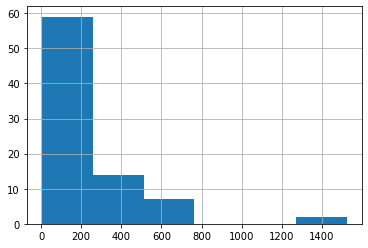

In [60]:
# Step 4 - look at the distributions by FOOD_CAT1 - I am curious to see so adding this step 
# creating a separate df for numeric values columns 

dfmv1['NUTR_CALORIES_g'].hist(bins=6)
plt.show()

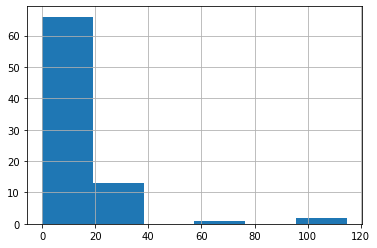

In [61]:
dfmv1['NUTR_TOTAL_FAT_g'].hist(bins=6)
plt.show()

In [62]:
# creating freq counts for the categorical variables
frenam = dfmv1['NUTR_FOOD_NAME'].value_counts()
frenam

Hamburger                                            10
Artichokes                                            8
Salad                                                 7
Corn                                                  7
Steak                                                 6
Asparagus                                             5
Cauliflower                                           5
Carrots                                               3
Eggplant                                              2
Pork Ribs                                             2
Spicy Chicken Sandwich                                2
Brocoli Rabe-Rapini                                   1
Marinated Eggplant                                    1
Brocoli                                               1
Fresh Riced Brocoli                                   1
BBQ Ribs - 1 small rib                                1
BBQ Ribs - 1 large rib                                1
Asian Eggplant - 1 eggplant                     

In [63]:
frenam = dfmv1['NUTR_FOOD_NAME'].value_counts()
frenam

Hamburger                                            10
Artichokes                                            8
Salad                                                 7
Corn                                                  7
Steak                                                 6
Asparagus                                             5
Cauliflower                                           5
Carrots                                               3
Eggplant                                              2
Pork Ribs                                             2
Spicy Chicken Sandwich                                2
Brocoli Rabe-Rapini                                   1
Marinated Eggplant                                    1
Brocoli                                               1
Fresh Riced Brocoli                                   1
BBQ Ribs - 1 small rib                                1
BBQ Ribs - 1 large rib                                1
Asian Eggplant - 1 eggplant                     

In [64]:
frenam = dfmv1['BRAND_NAME'].value_counts()
frenam

Nutritionix       10
Cowboy Chicken     3
Altar              2
Coolgreens         2
Fresh Attitude     1
                  ..
Chickpea           1
Severino           1
Cosmo's            1
Giant              1
Saladworks         1
Name: BRAND_NAME, Length: 69, dtype: int64

In [65]:
frenam = dfmv1['FOOD_CAT1'].value_counts()
frenam

Beef          16
Pork          10
Chicken       10
Salad         10
Artichokes     8
Corn           7
Eggplant       5
Califlower     5
Aspargus       5
Brocoli        3
Carrots        3
Name: FOOD_CAT1, dtype: int64

In [66]:
# step 5 - creating two new variables - these are the same as were created in Milestone 2

def calfun (cal, high, low):
    if cal > high:
        return("High")
    if cal > low:
        return("Medium")
    return("Low")

newcol = dfmv1["NUTR_CALORIES_g"].apply(calfun, args=[600, 120])
newcol

0     Medium
1     Medium
2     Medium
3     Medium
4     Medium
       ...  
79       Low
80       Low
81       Low
82       Low
83       Low
Name: NUTR_CALORIES_g, Length: 82, dtype: object

In [67]:
# I am getting warning messages that I didn't get before - another item to review so trying another way 
# creating a new variable 
dfmv1 = dfmv1.assign(CATEGORICAL_CAL=newcol)
dfmv1

NUTR_FOOD_NAME             BRAND_NAME  NUTR_CALORIES_g  NUTR_TOTAL_FAT_g  \
0       Hamburger        A&W Restaurants           350.00              11.0   
1       Hamburger            The Varsity           200.00               9.0   
2       Hamburger            Black Angus           255.57              20.0   
3       Hamburger        Jack in the Box           340.00              18.0   
4       Hamburger            Nutrisystem           240.00               8.0   
..            ...                    ...              ...               ...   
79           Corn        Natural Grocers            60.00               0.0   
80           Corn  Hale and Hearty Soups            35.00               0.5   
81           Corn                Wrapido           100.00               1.0   
82           Corn                 Chop't            45.00               0.0   
83           Corn             Saladworks            25.00               0.0   

   FOOD_CAT1 CATEGORICAL_CAL  
0       Beef          Medium  
1       Beef          Medium  
2       Beef          Medium  
3       Beef          Medium  
4       Beef          Medium  
..       ...             ...  
79      Corn             Low  
80      Corn             Low  
81      Corn             Low  
82      Corn             Low  
83      Corn             Low  

[82 rows x 6 columns]

In [68]:
# More 5 Creating a category for common foods 

def foodfun (food):
    if any(s in food for s in ('Chicken', 'Beef', 'Turkey', 'Lamb', "Veal", "Fish")):
        return("Meat")
    if any(s in food for s in ('Eggplant', 'Califlower', 'Brocoli', 'Artichokes', "Arugula", "Aspargus","Carrots", "Corn")):
        return("Vegetable")
    if any(s in food for s in ('Apples', 'Apricots', 'Grapes', 'Oranges', "Bananas", "Peaches", "Watermelon", "Strawberry")):
        return("Fruit")
    return("Not Categorized")

newcol2 = dfmv1["FOOD_CAT1"].apply(foodfun)
newcol2

0          Meat
1          Meat
2          Meat
3          Meat
4          Meat
        ...    
79    Vegetable
80    Vegetable
81    Vegetable
82    Vegetable
83    Vegetable
Name: FOOD_CAT1, Length: 82, dtype: object

In [69]:
# Using the new method to assign a new column 
# creating a new variable the same as in Milestone 2 
dfmv1 = dfmv1.assign(FOOD_CAT2=newcol2)
dfmv1

NUTR_FOOD_NAME             BRAND_NAME  NUTR_CALORIES_g  NUTR_TOTAL_FAT_g  \
0       Hamburger        A&W Restaurants           350.00              11.0   
1       Hamburger            The Varsity           200.00               9.0   
2       Hamburger            Black Angus           255.57              20.0   
3       Hamburger        Jack in the Box           340.00              18.0   
4       Hamburger            Nutrisystem           240.00               8.0   
..            ...                    ...              ...               ...   
79           Corn        Natural Grocers            60.00               0.0   
80           Corn  Hale and Hearty Soups            35.00               0.5   
81           Corn                Wrapido           100.00               1.0   
82           Corn                 Chop't            45.00               0.0   
83           Corn             Saladworks            25.00               0.0   

   FOOD_CAT1 CATEGORICAL_CAL  FOOD_CAT2  
0       Beef          Medium       Meat  
1       Beef          Medium       Meat  
2       Beef          Medium       Meat  
3       Beef          Medium       Meat  
4       Beef          Medium       Meat  
..       ...             ...        ...  
79      Corn             Low  Vegetable  
80      Corn             Low  Vegetable  
81      Corn             Low  Vegetable  
82      Corn             Low  Vegetable  
83      Corn             Low  Vegetable  

[82 rows x 7 columns]

In [70]:
# adding key to differentiate row from as was done in Milestone 3
dfmv1["SOURCE_KEY"] = "RESTAURANT"
dfmv1

NUTR_FOOD_NAME             BRAND_NAME  NUTR_CALORIES_g  NUTR_TOTAL_FAT_g  \
0       Hamburger        A&W Restaurants           350.00              11.0   
1       Hamburger            The Varsity           200.00               9.0   
2       Hamburger            Black Angus           255.57              20.0   
3       Hamburger        Jack in the Box           340.00              18.0   
4       Hamburger            Nutrisystem           240.00               8.0   
..            ...                    ...              ...               ...   
79           Corn        Natural Grocers            60.00               0.0   
80           Corn  Hale and Hearty Soups            35.00               0.5   
81           Corn                Wrapido           100.00               1.0   
82           Corn                 Chop't            45.00               0.0   
83           Corn             Saladworks            25.00               0.0   

   FOOD_CAT1 CATEGORICAL_CAL  FOOD_CAT2  SOURCE_KEY  
0       Beef          Medium       Meat  RESTAURANT  
1       Beef          Medium       Meat  RESTAURANT  
2       Beef          Medium       Meat  RESTAURANT  
3       Beef          Medium       Meat  RESTAURANT  
4       Beef          Medium       Meat  RESTAURANT  
..       ...             ...        ...         ...  
79      Corn             Low  Vegetable  RESTAURANT  
80      Corn             Low  Vegetable  RESTAURANT  
81      Corn             Low  Vegetable  RESTAURANT  
82      Corn             Low  Vegetable  RESTAURANT  
83      Corn             Low  Vegetable  RESTAURANT  

[82 rows x 8 columns]

In [71]:
# adding key as was done in Milestone 3
dfmv1["MRG_KEY"] = 1
dfmv1

NUTR_FOOD_NAME             BRAND_NAME  NUTR_CALORIES_g  NUTR_TOTAL_FAT_g  \
0       Hamburger        A&W Restaurants           350.00              11.0   
1       Hamburger            The Varsity           200.00               9.0   
2       Hamburger            Black Angus           255.57              20.0   
3       Hamburger        Jack in the Box           340.00              18.0   
4       Hamburger            Nutrisystem           240.00               8.0   
..            ...                    ...              ...               ...   
79           Corn        Natural Grocers            60.00               0.0   
80           Corn  Hale and Hearty Soups            35.00               0.5   
81           Corn                Wrapido           100.00               1.0   
82           Corn                 Chop't            45.00               0.0   
83           Corn             Saladworks            25.00               0.0   

   FOOD_CAT1 CATEGORICAL_CAL  FOOD_CAT2  SOURCE_KEY  MRG_KEY  
0       Beef          Medium       Meat  RESTAURANT        1  
1       Beef          Medium       Meat  RESTAURANT        1  
2       Beef          Medium       Meat  RESTAURANT        1  
3       Beef          Medium       Meat  RESTAURANT        1  
4       Beef          Medium       Meat  RESTAURANT        1  
..       ...             ...        ...         ...      ...  
79      Corn             Low  Vegetable  RESTAURANT        1  
80      Corn             Low  Vegetable  RESTAURANT        1  
81      Corn             Low  Vegetable  RESTAURANT        1  
82      Corn             Low  Vegetable  RESTAURANT        1  
83      Corn             Low  Vegetable  RESTAURANT        1  

[82 rows x 9 columns]

In [72]:
# reordering the columns - that works okay with a few variables 

dfmvf = dfmv1.iloc[:, [0, 1, 2, 5, 3, 4, 6, 7, 8]]
dfmvf

NUTR_FOOD_NAME             BRAND_NAME  NUTR_CALORIES_g CATEGORICAL_CAL  \
0       Hamburger        A&W Restaurants           350.00          Medium   
1       Hamburger            The Varsity           200.00          Medium   
2       Hamburger            Black Angus           255.57          Medium   
3       Hamburger        Jack in the Box           340.00          Medium   
4       Hamburger            Nutrisystem           240.00          Medium   
..            ...                    ...              ...             ...   
79           Corn        Natural Grocers            60.00             Low   
80           Corn  Hale and Hearty Soups            35.00             Low   
81           Corn                Wrapido           100.00             Low   
82           Corn                 Chop't            45.00             Low   
83           Corn             Saladworks            25.00             Low   

    NUTR_TOTAL_FAT_g FOOD_CAT1  FOOD_CAT2  SOURCE_KEY  MRG_KEY  
0               11.0      Beef       Meat  RESTAURANT        1  
1                9.0      Beef       Meat  RESTAURANT        1  
2               20.0      Beef       Meat  RESTAURANT        1  
3               18.0      Beef       Meat  RESTAURANT        1  
4                8.0      Beef       Meat  RESTAURANT        1  
..               ...       ...        ...         ...      ...  
79               0.0      Corn  Vegetable  RESTAURANT        1  
80               0.5      Corn  Vegetable  RESTAURANT        1  
81               1.0      Corn  Vegetable  RESTAURANT        1  
82               0.0      Corn  Vegetable  RESTAURANT        1  
83               0.0      Corn  Vegetable  RESTAURANT        1  

[82 rows x 9 columns]

Ethical consideration: 

This milestone was a big learning experience for me in terms of different types of API (Streaming & REST) as well as having a better understanding on how API is created to security concerns and strategies for API. For me, I initially thought that all API would be more like the weather API which seems very exact and very well maintained. However, my experience in trying to find a solid source for restaurant food information was not easy (though I assume that if I was paying for that information, many of my issues might resolve). Likewise, it became clear that a person maintains these lists or a company instead of a more unbiased approach like all restaurants and food companies needing to report out each food item and nutrients (e.g., like a government requirement or FDA requirement). This surprised me, because people introduce bias all the time in what they include or don’t include. And, what if there are issues with some sources (like a challenging format, or delays in reporting) then does that change what is included? Also, what if restaurants don’t want their customers to know the caloric and total fats or sodium of their dishes? Then they would not provide this information. Thus, the API would not have a ‘full set’ of details. Then API itself could have biases that would be unknown to the user unless the user is able to better understand how API is developed. This was very interesting to me – an unexpected potential to be biased by your data without even making one limiting decision while analyzing it or producing a single result. The API that I used for this part of our term project is very limited as the free API itself did not return many rows.  This was unfortunate and unexpected. This created ethical considerations that I will to limit any conclusions to the more limited amount of information that I had available to me. 


In [73]:
dfmvf.to_csv(r'C:\Users\kkooken\Documents\EDU\540\finalproject\rest_api.csv', index=False)